# Importação das bibliotecas e inicialização

In [51]:
from google.colab import files
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

In [2]:
uploaded = files.upload()

Saving melb_data.csv to melb_data (3).csv


In [3]:
dados = pd.read_csv(io.BytesIO(uploaded['melb_data.csv']))

dados.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Eliminação de atributos descartavéis e tratamento dos valores faltosos

In [4]:
discard = ["SellerG", "Address", "Lattitude", "Longtitude"]

X = dados.drop(discard, axis = 1)

X.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Regionname          0
Propertycount       0
dtype: int64

In [5]:
X = X.dropna(subset=["Car"])

In [6]:
mean_imputer = SimpleImputer()
mostFrequent_imputer = SimpleImputer(strategy='most_frequent')

mean_transformer = make_column_transformer(
                                           (mean_imputer, ["BuildingArea", "YearBuilt"]),
                                           (mostFrequent_imputer, ["CouncilArea"]),
                                           remainder="drop"
                                           )

X_mean = pd.DataFrame(mean_transformer.fit_transform(X), columns=["BuildingArea", "YearBuilt", "CouncilArea"], index=X.index)

In [7]:
X = pd.merge(X,X_mean)

X.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

# Geração de gráficos para visualização primária dos dados

In [8]:
numerical = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

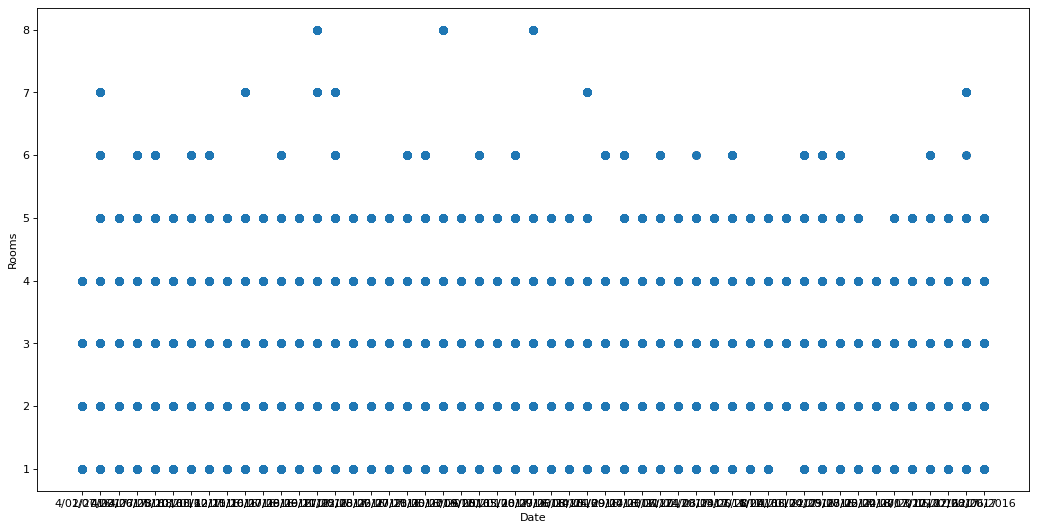

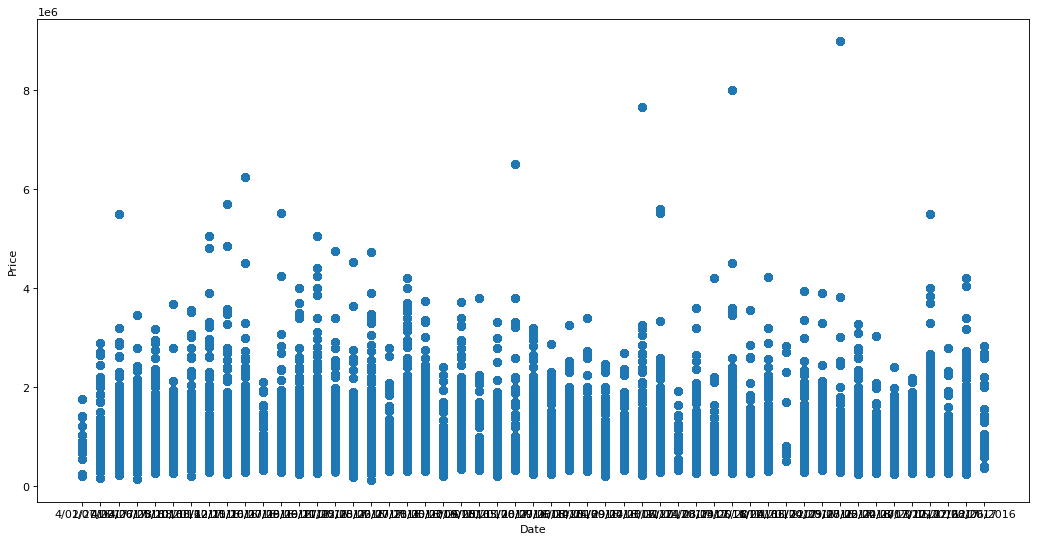

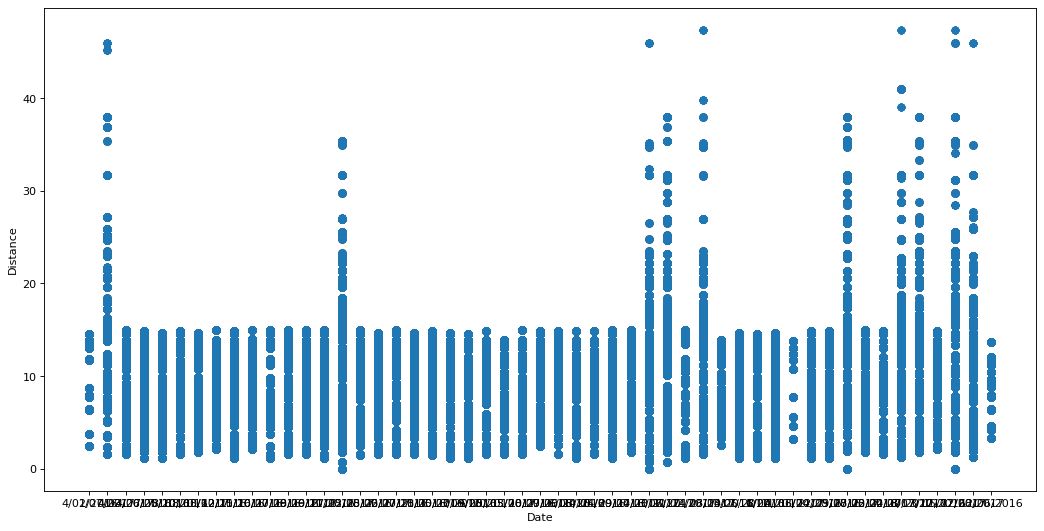

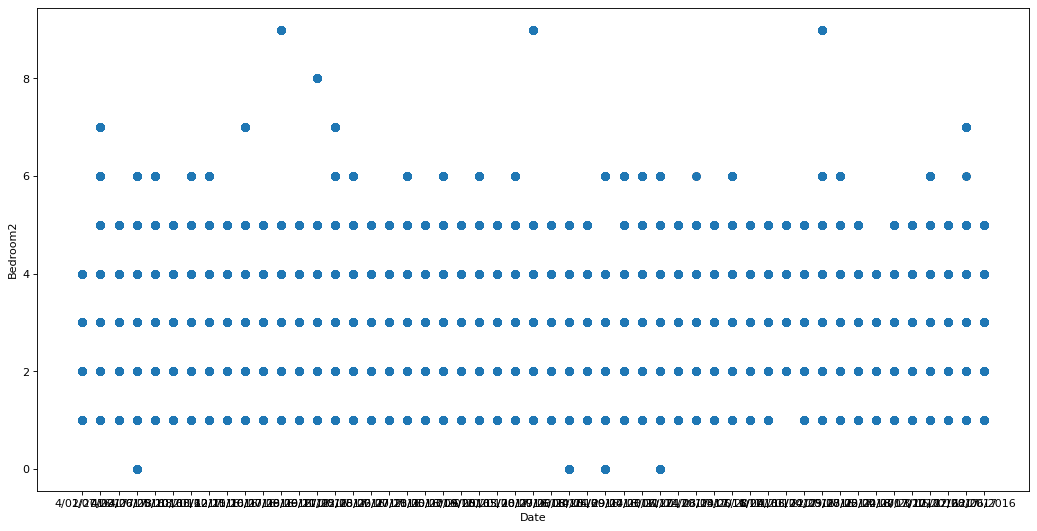

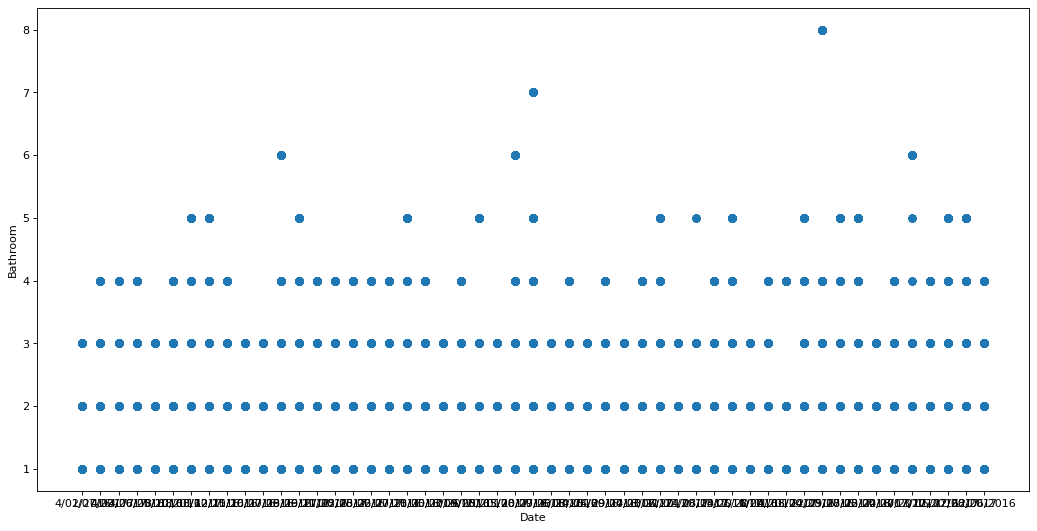

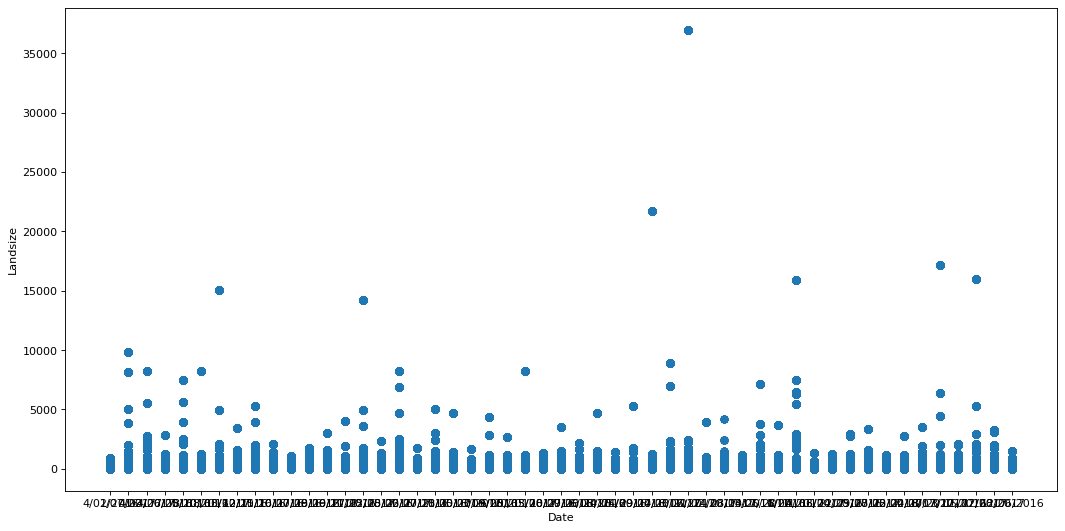

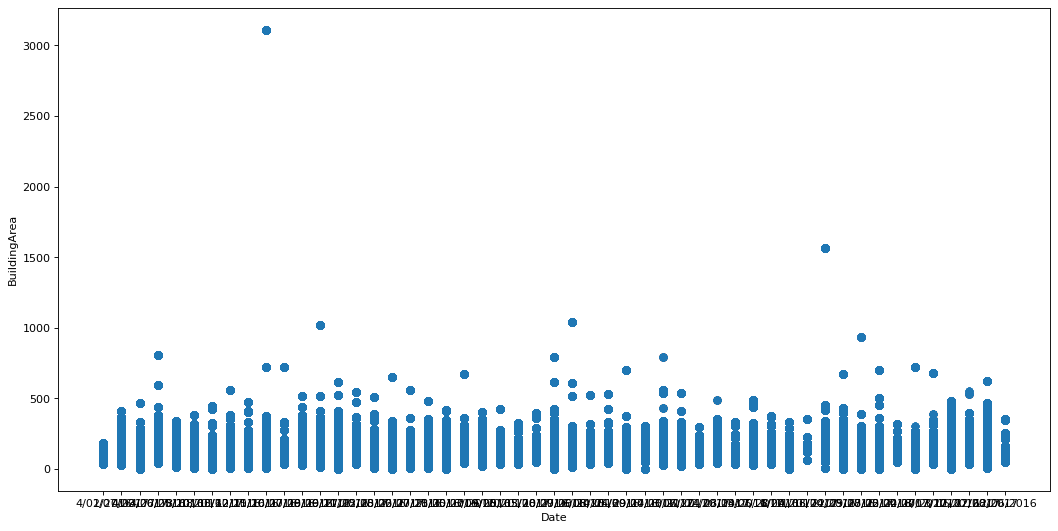

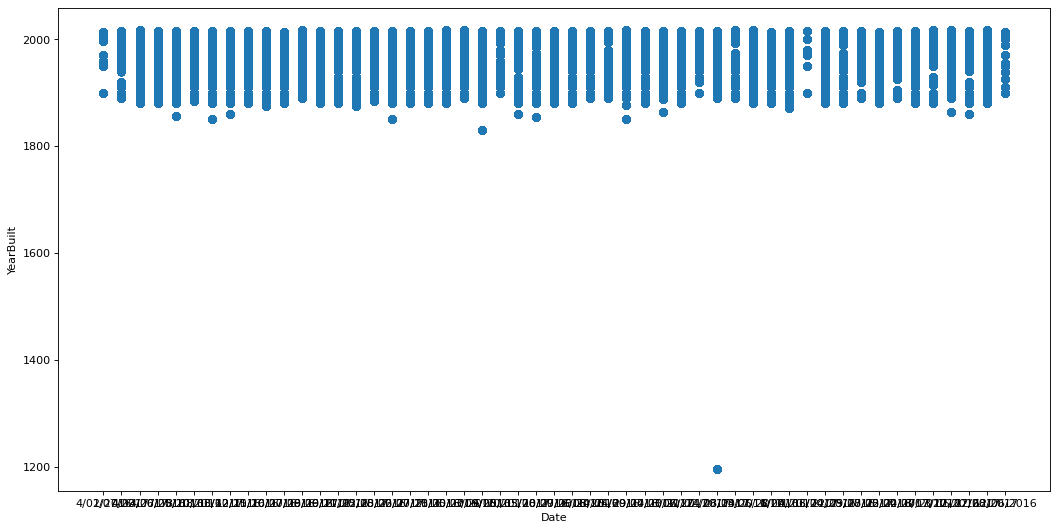

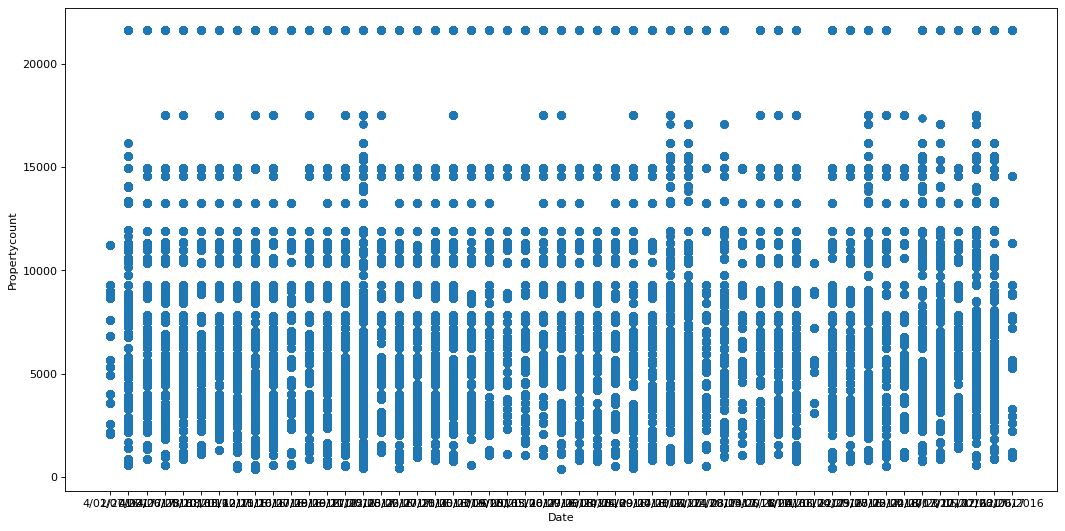

In [13]:
for item in numerical:
  plt.figure(figsize=(16, 8), dpi=80)
  plt.ylabel(item)
  plt.xlabel('Date')
  plt.scatter(X['Date'], X[item])
  plt.show()

# Tratamento dos outilers

In [9]:
clf = LocalOutlierFactor()

In [36]:
numerical_reduz = ['Price', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

X_predicted = X[numerical_reduz]

In [39]:
predicted = pd.Series(clf.fit_predict(X_predicted), name="predicted", index=X_predicted.index)

In [40]:
X_predicted = pd.concat([X_predicted, predicted], axis=1)

In [41]:
print(X_predicted.query("predicted == -1"))

          Price  Distance  Landsize  ... YearBuilt Propertycount  predicted
11    1097000.0       2.5     220.0  ...      1900        4019.0         -1
12    1097000.0       2.5     220.0  ...      1900        4019.0         -1
44    1195000.0       2.5     120.0  ...      1998        4019.0         -1
66    1980000.0       7.5     856.0  ...      1950        9264.0         -1
67    1980000.0       7.5     856.0  ...      1950        9264.0         -1
...         ...       ...       ...  ...       ...           ...        ...
7077  1975000.0       7.2     458.0  ...      1900        4898.0         -1
7140  1282500.0      12.0     499.0  ...      2015       21650.0         -1
7179   452000.0      14.7     567.0  ...      1980       16166.0         -1
7275  9000000.0      18.8     744.0  ...      1960        7113.0         -1
7301   600000.0       5.0       0.0  ...      1930       13240.0         -1

[366 rows x 7 columns]


In [42]:
X = X.drop(X_predicted.query("predicted == -1").index)

# Geração de gráficos para visualização pós tratamento dos dados

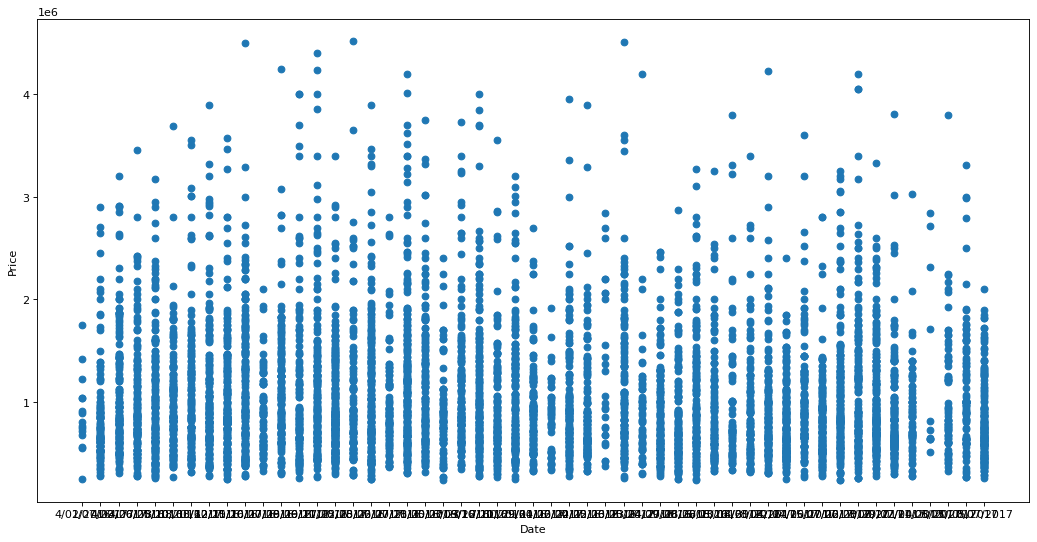

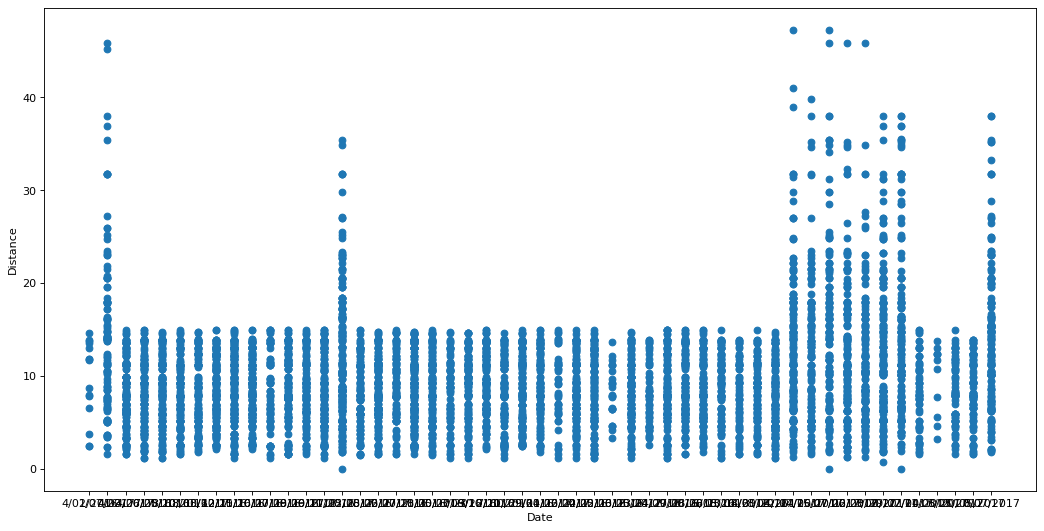

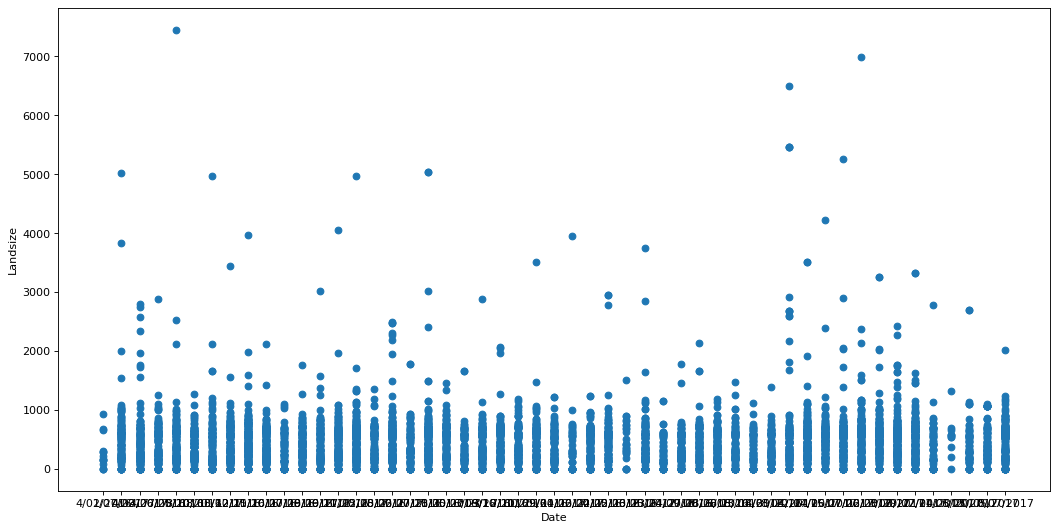

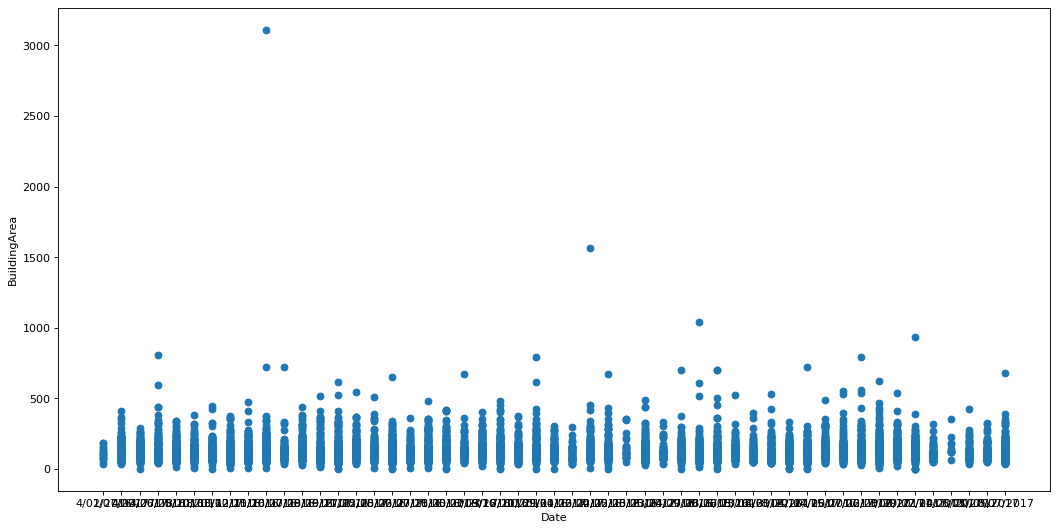

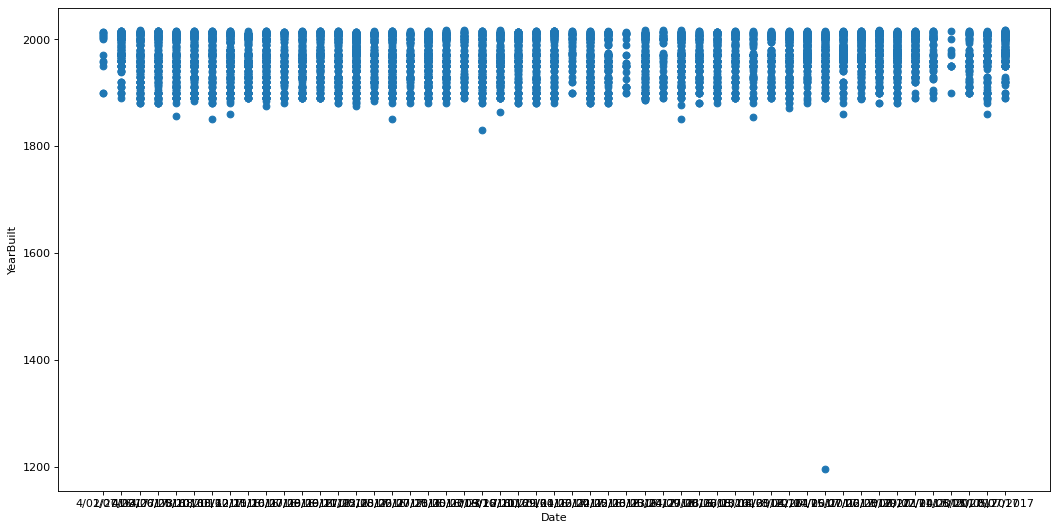

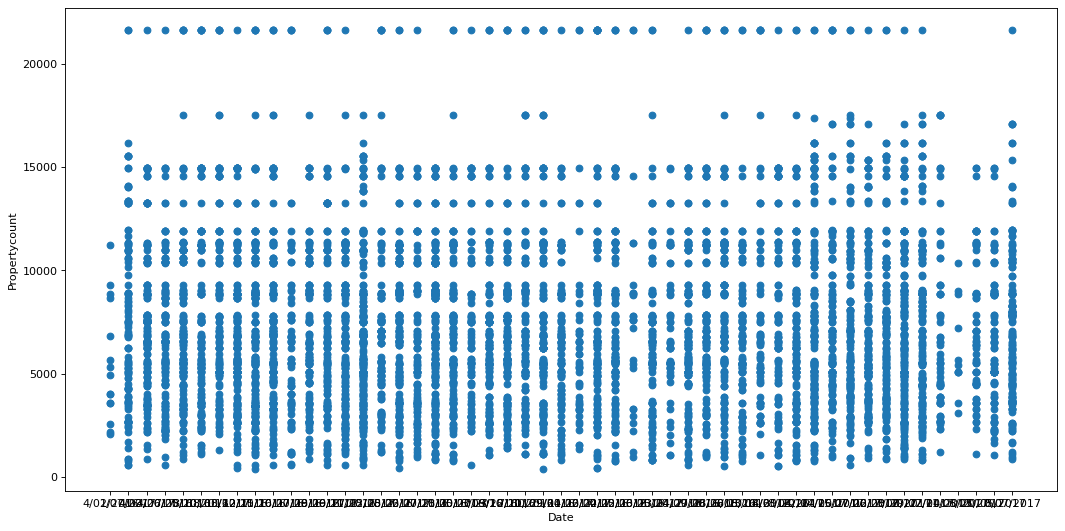

In [43]:
for item in numerical_reduz:
  plt.figure(figsize=(16, 8), dpi=80)
  plt.ylabel(item)
  plt.xlabel('Date')
  plt.scatter(X['Date'], X[item])
  plt.show()

# Transformação dos dados 

In [44]:
Type = pd.get_dummies(X['Type'], prefix = 'T')
Method = pd.get_dummies(X['Method'], prefix = 'Met')

In [47]:
X = X.join(Type)
X = X.join(Method)

In [55]:
X.head()

,Suburb,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,T_h,T_t,T_u,Met_PI,Met_S,Met_SA,Met_SP,Met_VB
0,Abbotsford,2,1035000.0,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79,1900,Yarra,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
1,Abbotsford,2,1035000.0,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79,1900,Yarra,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
2,Fitzroy North,2,1350000.0,1/07/2017,3.6,3068.0,2.0,1.0,1.0,184.0,79,1900,Yarra,Northern Metropolitan,6244.0,1,0,0,0,0,0,0,1
3,Fitzroy North,2,1350000.0,1/07/2017,3.6,3068.0,2.0,1.0,1.0,184.0,79,1900,Yarra,Northern Metropolitan,6244.0,1,0,0,0,0,0,0,1
4,Abbotsford,3,1465000.0,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150,1900,Yarra,Northern Metropolitan,4019.0,1,0,0,0,0,0,1,0


In [57]:
for item in numerical:
  X[item] = (X[item] - X[item].min()) / (X[item].max() - X[item].min())

In [58]:
X.head()

,Suburb,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,T_h,T_t,T_u,Met_PI,Met_S,Met_SA,Met_SP,Met_VB
0,Abbotsford,0.142857,0.185531,4/02/2016,0.052854,3067.0,0.222222,0.000000,0.0,0.020926,0.0253856,0.856448,Yarra,Northern Metropolitan,0.170735,1,0,0,0,1,0,0,0
1,Abbotsford,0.142857,0.185531,4/02/2016,0.052854,3067.0,0.222222,0.000000,0.0,0.020926,0.0253856,0.856448,Yarra,Northern Metropolitan,0.170735,1,0,0,0,1,0,0,0
2,Fitzroy North,0.142857,0.259043,1/07/2017,0.076110,3068.0,0.222222,0.000000,1.0,0.024681,0.0253856,0.856448,Yarra,Northern Metropolitan,0.275387,1,0,0,0,0,0,0,1
3,Fitzroy North,0.142857,0.259043,1/07/2017,0.076110,3068.0,0.222222,0.000000,1.0,0.024681,0.0253856,0.856448,Yarra,Northern Metropolitan,0.275387,1,0,0,0,0,0,0,1
4,Abbotsford,0.285714,0.285881,4/03/2017,0.052854,3067.0,0.333333,0.142857,0.0,0.017975,0.0482005,0.856448,Yarra,Northern Metropolitan,0.170735,1,0,0,0,0,0,1,0
